  Para esse tech challenge usei a base de dados de pessoas de diferentes gêneros e idades, se são fumantes, tem filhos ou não e qual seu IMC (índice de massa corporal) conforme ideia fornecida para a atividade.
  Com base nesses dados, cria-se um modelo preditivo de regressão para prever custos médicos individuais dessas pessoas.

 Etapas do desenvolvimento do Tech Challenge:

**1. Exploração dos dados:**
*   carregamento da base de dados;
*   Exploração das características da base de dados (ex: colunas, tipos de dados).
*   Analisar as estatísticas descritivas (como média e desvio padrão) e visualizar distribuições relevantes (histogramas, boxplots e pairplot).

**2. Pré-processamento dos Dados:**

* Limpeza de dados: tratamento de valores ausentes caso houver (nesse caso estipulei valores exatos na criação da tabela, mas no mundo real deve-se ser tratado valores nulos, como por exemplo, substituir valores nulos com 0 usando df.fillna(0) ou uso de medianas de valores).

* Conversão de variáveis categóricas: transformei variáveis como "gênero" e "região" em numéricas (usando one-hot encoding).

* Escolha de técnica de regressão: regressão Linear
* Divisão dos dados em conjuntos de treinamento e teste (ex: 80% dos dados foram usados para treino e 20% para teste).

**3. Treinamento e Avaliação:**

* Treinar o modelo com o conjunto de treinamento.
* Avalie o desempenho do modelo com o conjunto de teste usando métricas como R², MSE, MAE.

**4. Validação Estatística:**

* Análise dos resultados e verificação de se o modelo atende aos requisitos de precisão e confiabilidade.

**5. Insights conclusivos**


In [153]:
import pandas as pd
dataf = pd.read_csv('insurance.csv')
dataf.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


Representação em gráfico de caixas (boxplot) onde o eixo x mostram fumantes (0 para não e 1 para sim) e o eixo y mostram os valores de imc.

In [154]:
import seaborn as sb

<ipython-input-121-bf857fe4f1b7>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x='smoker', y='bmi', data=dataf, palette="hls", legend=False )


<Axes: xlabel='smoker', ylabel='bmi'>

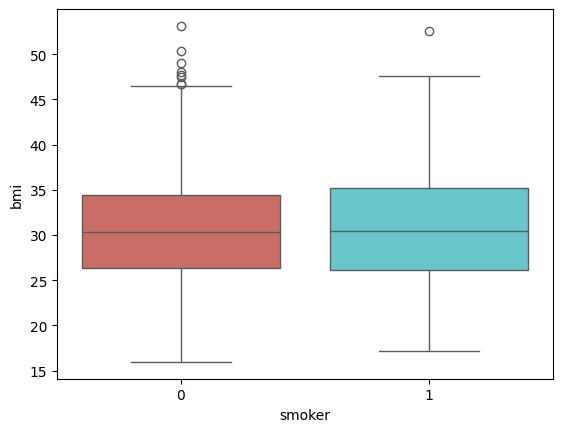

In [121]:
sb.boxplot(x='smoker', y='bmi', data=dataf, palette="hls", legend=False )
#contém outliers tanto par afumanes quanto não fumantes

<ipython-input-122-e7ac38364800>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x='children', y='age', data=dataf, palette="hls", legend=False )


<Axes: xlabel='children', ylabel='age'>

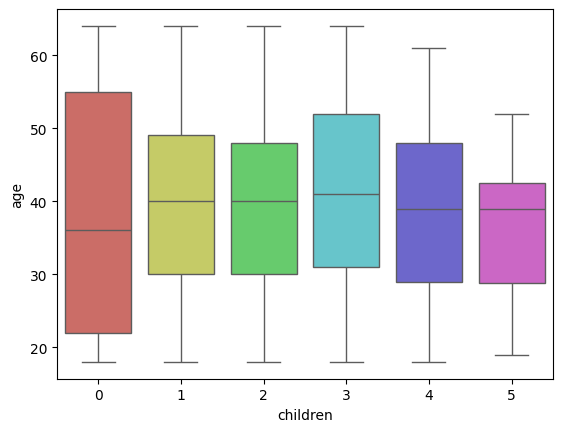

In [122]:
sb.boxplot(x='children', y='age', data=dataf, palette="hls", legend=False )
#é possivel verificar um número maior de pessoas sem filhos em comparação as que tem na mesma idade

## Relação de custos médicos e frequência de gastos

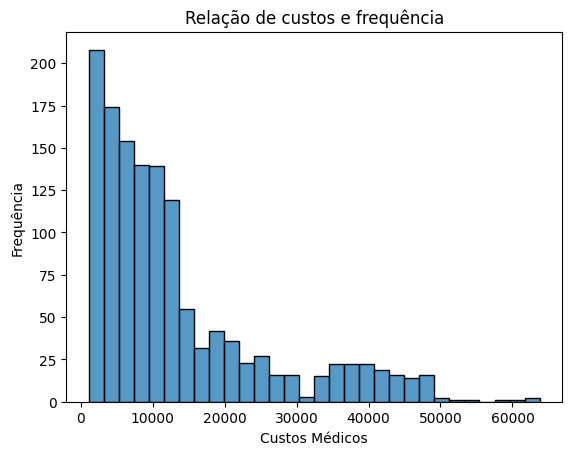

In [111]:
import matplotlib.pyplot as plt

sb.histplot(dataf['charges'])
plt.title('Relação de custos e frequência')
plt.xlabel('Custos Médicos')
plt.ylabel('Frequência')
plt.show()

## Relação de custos médicos e fumantes 💰
Esse boxplot mostra a relação de custos médicos entre pacientes fumantes e não-fumantes, sendo 0 para não-fumantes e 1 para fumantes ativos.

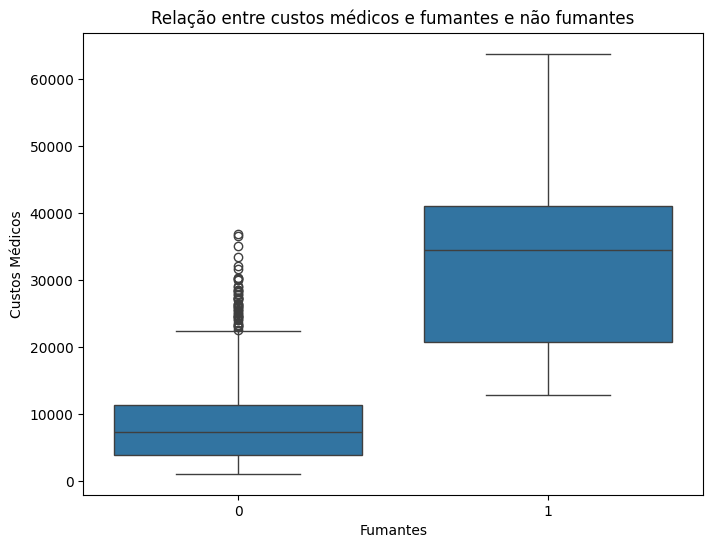

In [94]:
plt.figure(figsize=(8,6))
sb.boxplot(x='smoker', y='charges', data=dataf)
plt.title('Relação entre custos médicos e fumantes e não fumantes')
plt.xlabel('Fumantes')
plt.ylabel('Custos Médicos')
plt.show()
# é possivel verificar muitos outliers em não fumantes

## Separação de dados de treino e teste  🧪 📊

In [155]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#separando base ente treino e teste
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(dataf, test_size = 0.2, random_state = 8)

# Importando a base de dados
dataf.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [156]:
print(len(df_train), "treinamento +", len(df_test), "teste")

1070 treinamento + 268 teste


## Analisando distribuições de dados com histogramas 🔖

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>],
       [<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'children'}>],
       [<Axes: title={'center': 'smoker'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

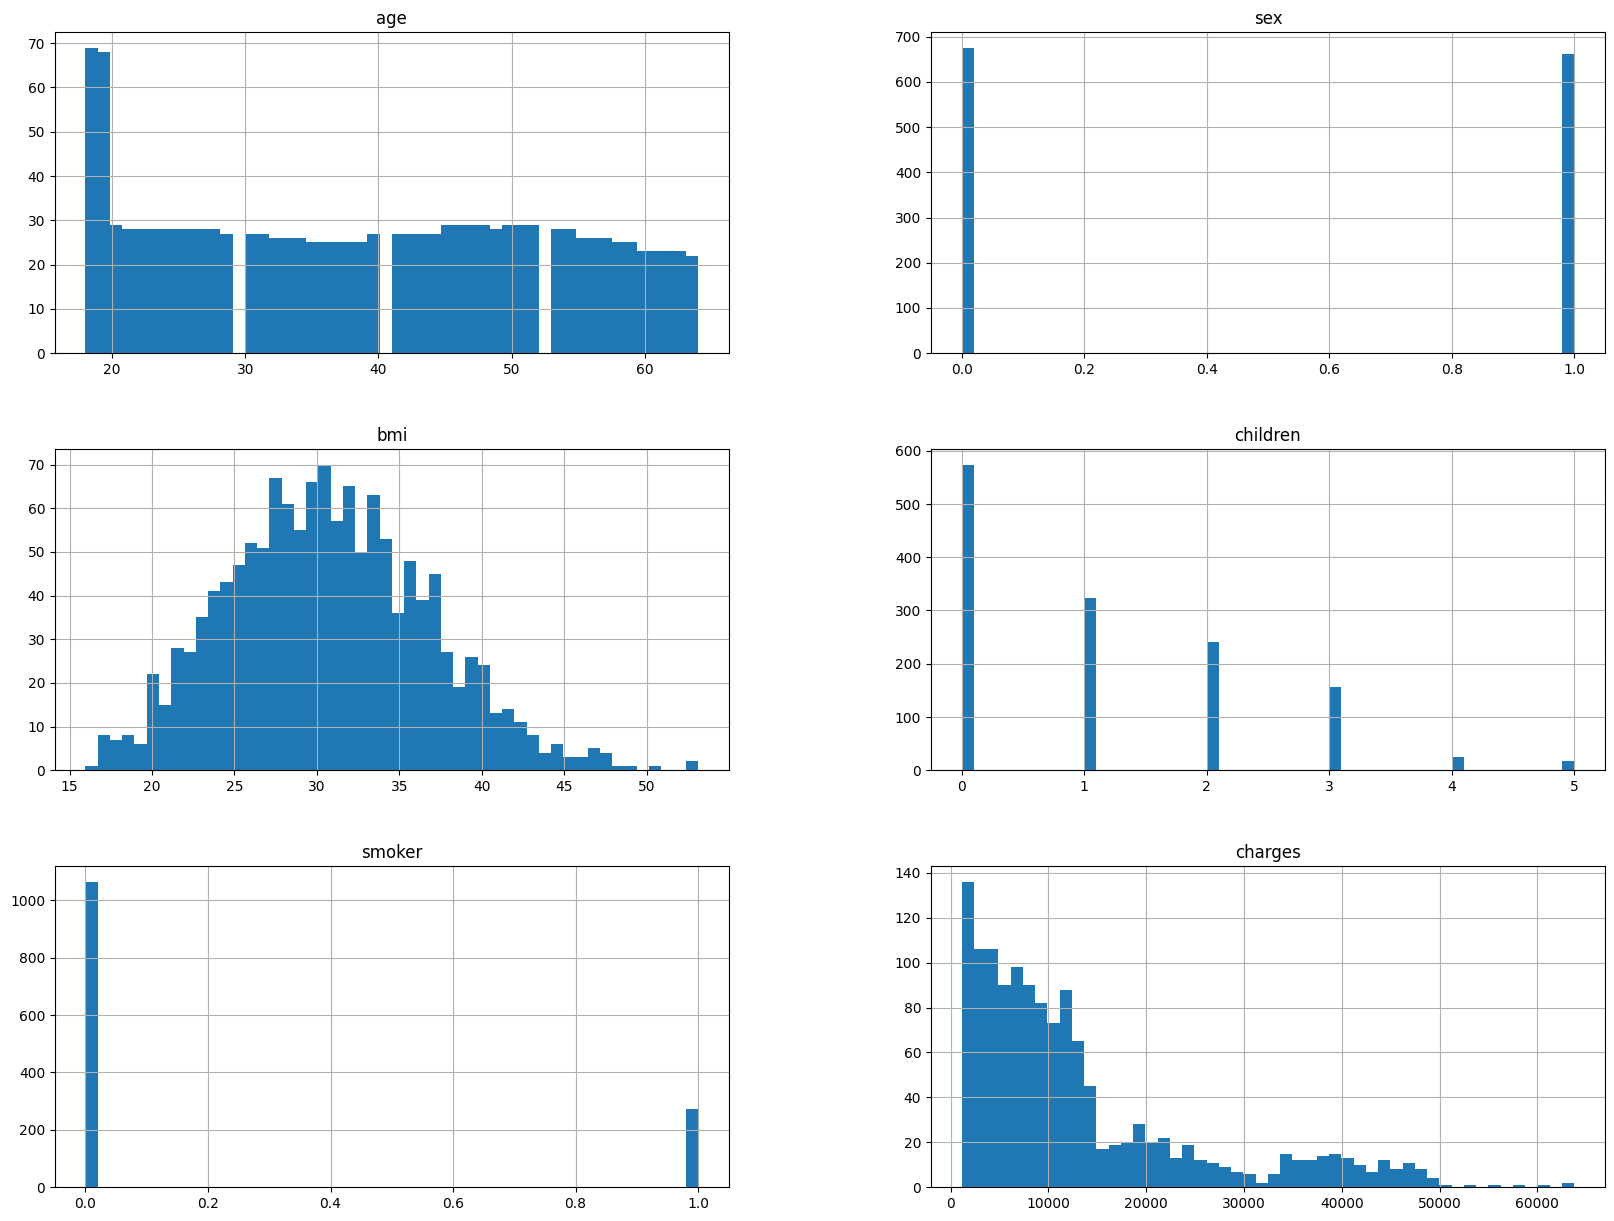

In [125]:
%matplotlib inline
import matplotlib.pyplot as plt
dataf.hist(bins=50, figsize=(20,15))

## Visualização de gráficos Pairplot

Em um gráfico pairplot se explora relação entre variáveis numéricas


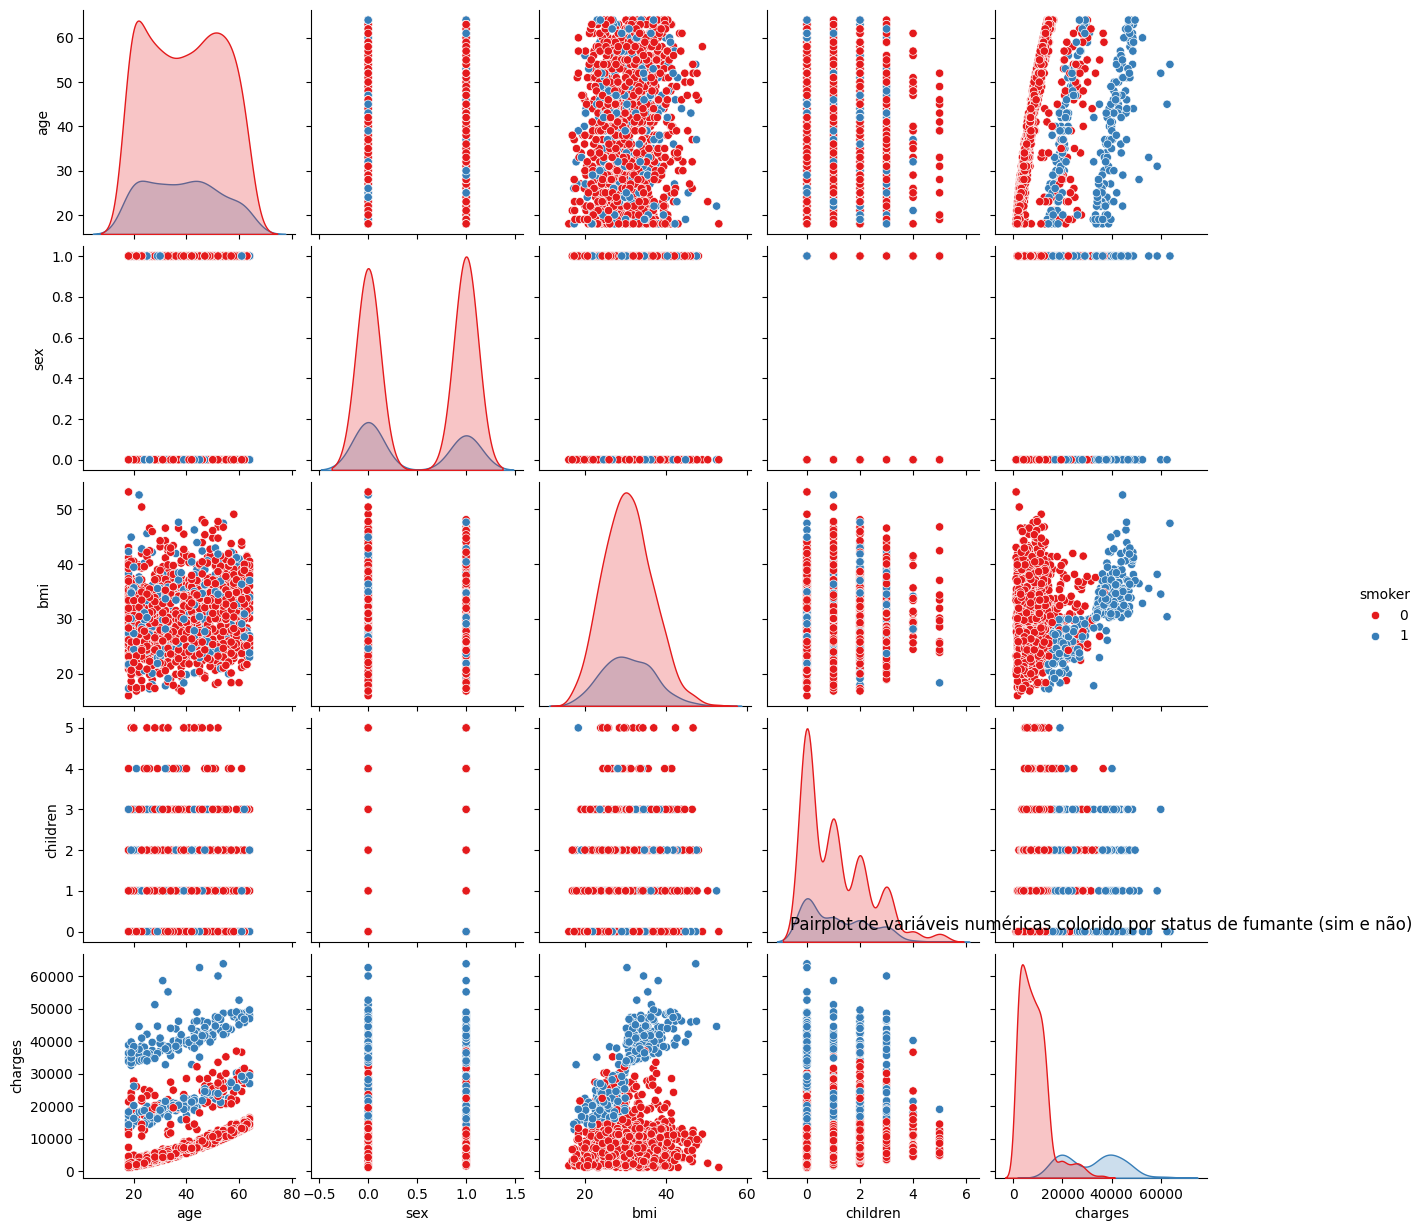

In [157]:
sb.pairplot(dataf, hue='smoker', palette='Set1', diag_kind='kde')

# display the plot
plt.title('Pairplot de variáveis numéricas colorido por status de fumante (sim e não)')
plt.show()

## Criando a pipeline de pré-processamento dos dados 🔧
Tratando valores nulos e sbstituindo pela mediana e também aplicando a técnica de one-hot encoder na coluna region

In [130]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

#atribuição de valores aos eixos e a variavel target
x = dataf.drop('charges', axis=1) # removendo a varivel target
y = dataf['charges']

# Definição das variáveis numéricas e categóricas
categ_attributs = ['region']
num_attributs = ['age', 'bmi', 'children']

# Aplicando OneHotEncoder e StandardScaler nas variaveis categoricas e numericas
preprocessor = ColumnTransformer(
    transformers=[
        ('numerica', StandardScaler(), num_attributs),
        ('categorica', OneHotEncoder(), categ_attributs)
    ])
insurance_preprocessed = preprocessor.fit_transform(x)


## Renomeando colunas no dataframe com novas colunas


In [152]:
print(insurance_df.isnull().sum()) #sem numeros nulos, logo nao prpecisa de tratamento de dados nulos

age                 0
sex                 0
bmi                 0
children            0
smoker              0
region_northwest    0
region_northeast    0
region_southwest    0
region_southeast    0
charges             0
income_charges      0
dtype: int64


In [137]:
# Dividindo os dados em conjuntos de treinamento e teste
X = dataf[['bmi']]  # Recurso (variável independente)
y = dataf['smoker']  # Rótulo (variável dependente)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(insurance_preprocessed, y, test_size=0.2, random_state=42)


## Modelo de Regressão Linear

In [138]:
from sklearn.linear_model import LinearRegression
# Criando e treinando o modelo de regressão linear
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
previsoes = modelo.predict(X_test)
print(previsoes)

[0.21237846 0.18119483 0.14227122 0.18783006 0.20482894 0.18282455
 0.21016429 0.1360197  0.22906581 0.18179846 0.21163166 0.18610093
 0.25643476 0.23698188 0.19869554 0.23121384 0.22618489 0.22627544
 0.23259642 0.17279776 0.23168121 0.18183366 0.20547149 0.22501517
 0.18066817 0.18254047 0.14320579 0.21280859 0.20866278 0.265864
 0.20056434 0.14964433 0.25881979 0.21437582 0.20177174 0.19158134
 0.2110822  0.1771165  0.16752668 0.24307676 0.23773682 0.2070402
 0.15487211 0.15034783 0.25337452 0.15521968 0.21344927 0.21895661
 0.24496211 0.25478417 0.19695548 0.27254966 0.175162   0.23859026
 0.20819183 0.20117609 0.22152377 0.20473053 0.14724766 0.18367076
 0.14071691 0.25355454 0.15993139 0.18782694 0.18647171 0.2013902
 0.23022583 0.23730826 0.20769127 0.19594823 0.20956858 0.20688288
 0.22044501 0.24658711 0.22982515 0.2398232  0.2405893  0.15460098
 0.26220279 0.18908951 0.26114706 0.17430653 0.19941217 0.23783766
 0.2535683  0.18884008 0.26635557 0.15201269 0.18313975 0.1712769


In [139]:
import numpy as np
# Avaliando o desempenho do modelo
erro_medio_quadratico = mean_squared_error(y_test, previsoes) #mae
erro_absoluto_medio = mean_absolute_error(y_test, previsoes) #mse
rmse = np.sqrt(erro_absoluto_medio) #rmse
r_quadrado = r2_score(y_test, previsoes) #R²

print(f'Erro Médio Quadrático: {erro_medio_quadratico}')
print(f'Erro Absoluto Médio: {erro_absoluto_medio}')
print(f'Raiz quadrada do erro-médio (RMSE): {rmse:.2f}')
print(f'R² (coeficiente de determinação): {r_quadrado}')

Erro Médio Quadrático: 0.1609058622457474
Erro Absoluto Médio: 0.324141380754438
Raiz quadrada do erro-médio (RMSE): 0.57
R² (coeficiente de determinação): -7.811093272436231e-05


## Comparação de valores reais vs. valores preditos

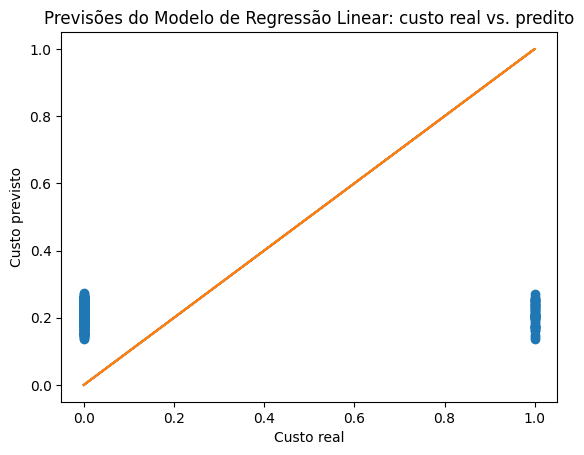

In [148]:
# Visualizando as previsões
plt.scatter(y_test, previsoes, label='Real')
plt.plot(y_test, y_test, y_test, y_test)
plt.xlabel('Custo real')
plt.ylabel('Custo previsto')
plt.title('Previsões do Modelo de Regressão Linear: custo real vs. predito')
plt.show()

# Análise e insights 📈

* Existem muito outliers que podem estar associados a um problema de saúde
específico tanto para fumantes quanto para não fumantes e o modelo acabou não aceitando.
* Os valores reais em azul quanto os valores previstos na linha vermelha indicam que o modelo acompanha a mudança geral dos dados e esta próximo da linha de previsão.


